


# Bike Sharing Demand Prediction - MultiLinear Regression

## Problem Statement

BoomBikes is a bike-sharing firm from US which provides bikes for rental, to individuals on a short term basis.
Company targets to create a mindful business plan to accelerate its revenue and they want to understand the factors affecting the demand for these shared bikes in the American market.
The company wants to know, 
- Which variables are significant in predicting the demand for shared bikes. 
- How well those variables describe the bike demands.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Objective: Develop machine learning model to find the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.  

### Step 1: Reading and Understanding the Data

In [1]:
#import the general packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import ml packages
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
#Read data file
df=pd.read_csv('bikesharing_survey.csv')

In [4]:
df.columns = df.columns.str.strip()

In [5]:
#plot the table
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# rows and columns
df.shape

(730, 16)

In [7]:
#variable details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<b>All the variables are non-null, missing value handling is not required

<b>Accept 'dteday' column, all other columns are numeric variables

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Data Visualisation

Text(0.5, 1.0, 'Bike sharing demand by date - year 1')

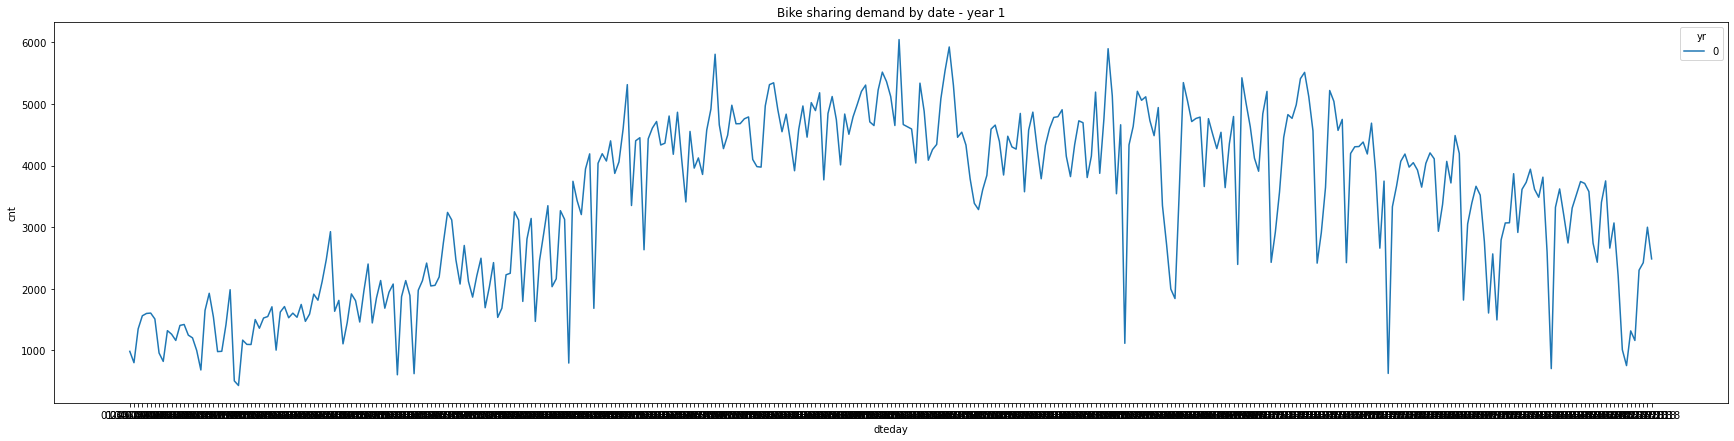

In [9]:
## create a line plot by target variable and date to visualize the demand across years

plt.figure(figsize=(30, 7))
sns.lineplot(x = 'dteday', y = 'cnt', estimator=np.sum, data = df[(df.yr == 0)], hue='yr')
plt.title('Bike sharing demand by date - year 1')

Text(0.5, 1.0, 'Bike sharing demand by date - year 2')

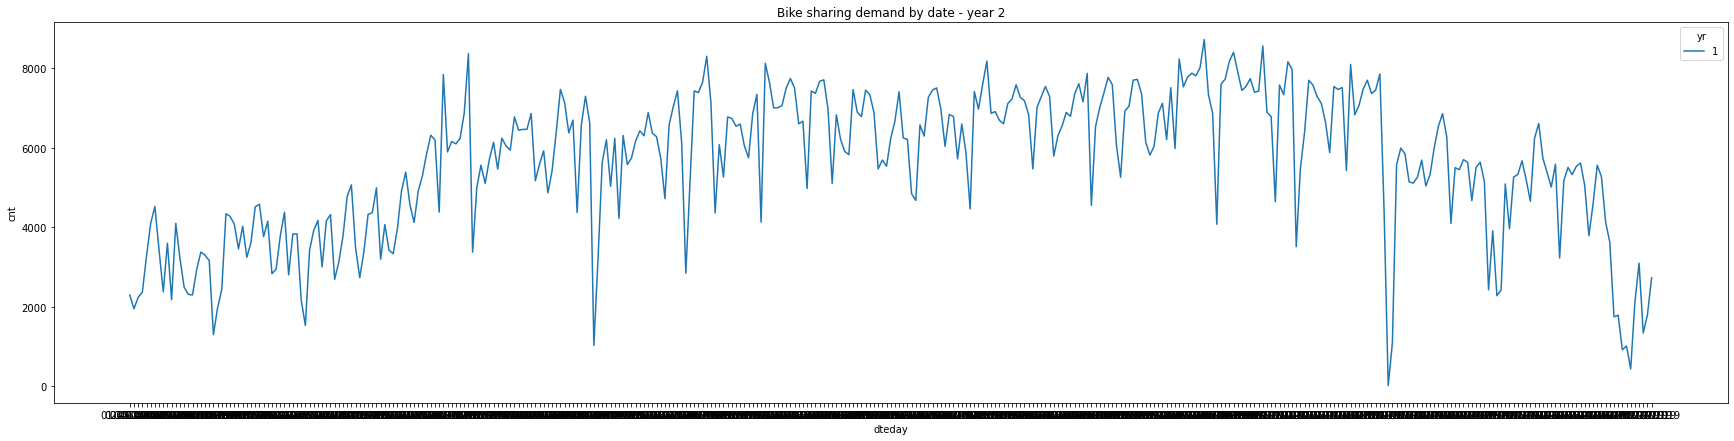

In [10]:
## create a line plot by target variable and date to visualize the demand across years

plt.figure(figsize=(30, 7))
sns.lineplot(x = 'dteday', y = 'cnt', estimator=np.sum, data = df[(df.yr == 1)], hue='yr')
plt.title('Bike sharing demand by date - year 2')

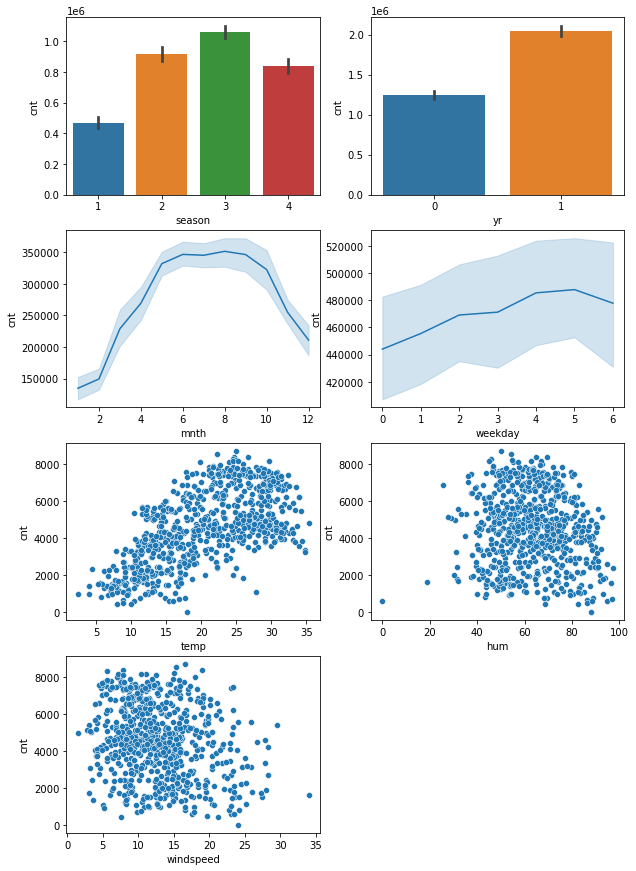

In [11]:
## to understand the relationship between the target variable(count - cnt) 
## and independent variables (both numerical and categorial)

plt.figure(figsize=(10, 15))
plt.subplot(4,2,1)
sns.barplot(x = 'season', y = 'cnt', estimator=np.sum, data = df)
plt.subplot(4,2,2)
sns.barplot(x = 'yr', y = 'cnt', estimator=np.sum, data = df)
plt.subplot(4,2,3)
sns.lineplot(x = 'mnth', y = 'cnt', estimator=np.sum, data = df)
plt.subplot(4,2,4)
sns.lineplot(x = 'weekday', y = 'cnt', estimator=np.sum, data = df)
plt.subplot(4,2,5)
sns.scatterplot(x = 'temp', y = 'cnt', estimator=np.sum, data = df)
plt.subplot(4,2,6)
sns.scatterplot(x = 'hum', y = 'cnt', estimator=np.sum, data = df)
plt.subplot(4,2,7)
sns.scatterplot(x = 'windspeed', y = 'cnt', estimator=np.sum, data = df)
plt.show()

#### Some observations from the plots
1. Summer has the highest demand for bikes
2. The bike demand increased from Year1 to Year2
3. The bike demand is increasing from Jan to May
4. The bike demand is high during months May to Sep 
5. Demand coming down Oct,Nov and Dec months 
6. Demand is highest during sunny days with clear skies. 
7. The demand is very low in winder season 
8. Demand increases as temperature increases
9. Low demand with the increase in windspeed

<AxesSubplot:>

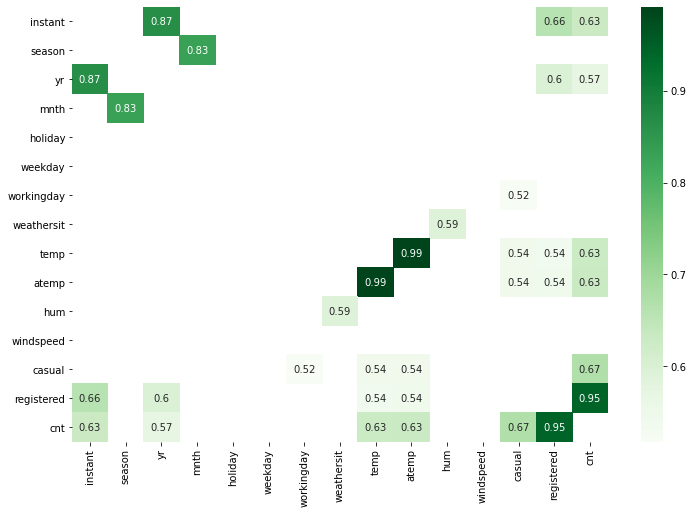

In [12]:
# Correlations between the variables - High collinear variables are plotted
corr = df.corr().abs()

limit = corr[(corr>=.5) & (corr != 1)]
plt.figure(figsize=(12,8))
sns.heatmap(limit, annot=True,cmap="Greens")

#### Some observations from the correlation plot
1. Season & month, instany & yr, temp & atemp, registered & cnt have strong correlation
2. cnt have +ve correlation with instant, yr, temp and casual

### Step 3: Data Preparation

Replace categories of numerical variables(these variables are actually categorical type) with meaningful names as these names are handy when dummy variables are created. 

Create dummy variables for the categorical variables to convert them to numerical type. 

Drop columns that are not significant to analysis and business. 

Multicollinearity - Drop columns with high collinearity.

In [13]:
# season column
# Replace categorical numeric values with categorical string values
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [14]:
df['weekday']=df['weekday'].map({1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat',0:'sun'})

In [15]:
df['mnth']=df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [16]:
# weathersit column
df['weathersit']=df['weathersit'].map({1:'clear',2:'mist',3:'ThunderStrom'})

In [17]:
# Function to count the unique values for each column in a DataFrame
def count_unique_values(df):
    uniques = []
    nuniques = []
    column_list = df.columns
    totalRows = df.count()
    temp = pd.DataFrame(totalRows)
    temp.columns = ['Total']            # Count total number of non-null values
    for column_name in column_list:
        #if df[column_name].nunique()>(100):
            #print(column_name, ': ',df[column_name].unique())
        unique=df[column_name].unique()
        nunique=df[column_name].nunique()
        uniques.append(unique)
        nuniques.append(nunique)
    temp['NUniques'] = nuniques
    temp['Uniques'] = uniques
    
    return(temp)

In [18]:
count_unique_values(df)

,Total,NUniques,Uniques
instant,730,730,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
dteday,730,730,"[01-01-2018, 02-01-2018, 03-01-2018, 04-01-201..."
season,730,4,"[spring, summer, fall, winter]"
yr,730,2,"[0, 1]"
mnth,730,12,"[jan, feb, mar, apr, may, jun, jul, aug, sep, ..."
holiday,730,2,"[0, 1]"
weekday,730,7,"[sat, sun, mon, tue, wed, thu, fri]"
workingday,730,2,"[0, 1]"
weathersit,730,3,"[mist, clear, ThunderStrom]"
temp,730,498,"[14.110847, 14.902598000000001, 8.050924, 8.2,..."


In [19]:
#binary catagorical variables, 'yr','holiday','workingday'
#Other catagorical variables are ['season','month','weekday','weathersit'] which needs to convert to dummy variables
#Encoding catagorical variables they become Numeric so that they can be fed to the model


In [20]:
#pair-wise correlation
# Columns 'casual','registered' are put together to get 'cnt' column
#'temp' and 'atemp' are having very high correlation, temp can be dropped 
#'season' and 'month' has high correlation


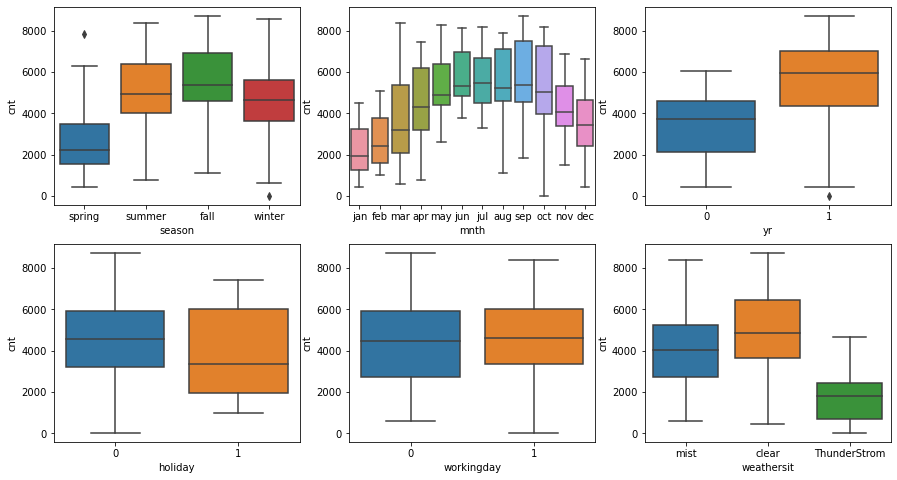

In [21]:
#Visualize the catagorical variable
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.boxplot(data=df, x='season',y='cnt')
plt.subplot(2,3,2)
sns.boxplot(data=df, x='mnth',y='cnt')
plt.subplot(2,3,3)
sns.boxplot(data=df, x='yr',y='cnt')
plt.subplot(2,3,4)
sns.boxplot(data=df, x='holiday',y='cnt')
plt.subplot(2,3,5)
sns.boxplot(data=df, x='workingday',y='cnt')
plt.subplot(2,3,6)
sns.boxplot(data=df, x='weathersit',y='cnt')
plt.show()

In [22]:
#First column 'instant' is just representing as index hence not required for the Regression Study
#dteday date column is not required as the derived columns related to date are available
df=df.drop(['instant','dteday'],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
# Columns 'casual','registered' are put together to get 'cnt' column
# hence both columns are dropped
df=df.drop(['casual','registered'],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
#'temp' and 'atemp' are having very high correlation, temp can be dropped 
df=df.drop('temp',axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,11.46350,43.6957,12.522300,1600


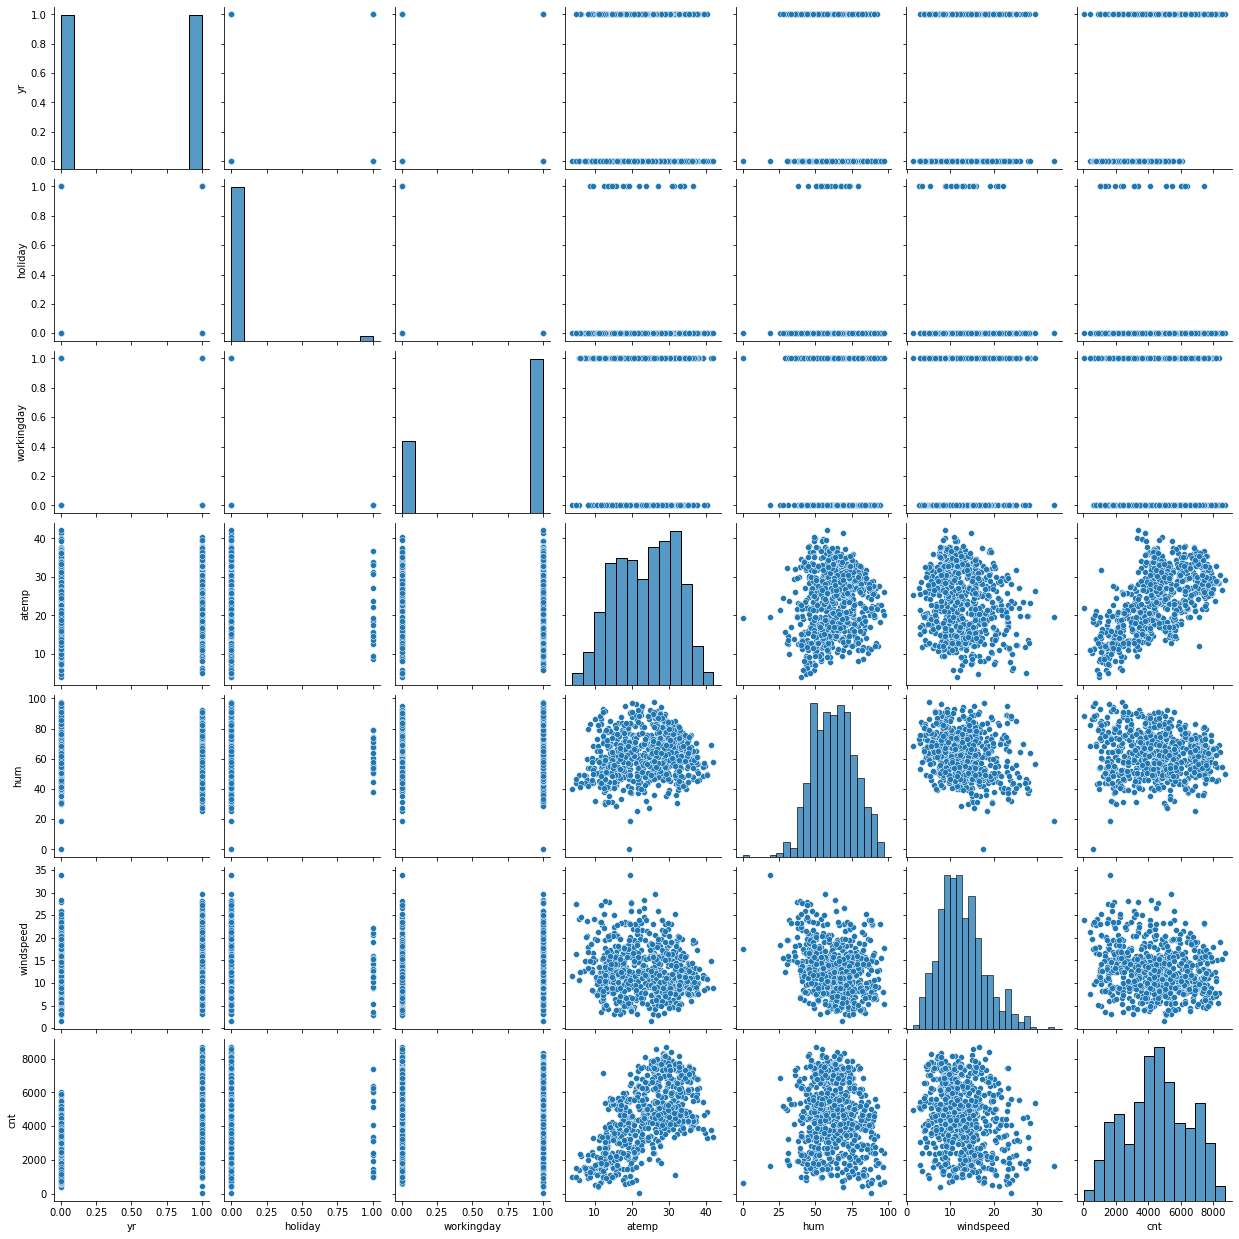

In [25]:
sns.pairplot(df)
plt.show()

### Dummies

In [26]:
# Create dummy variables for furnishing status
#Drop redundant dummy variable
season=pd.get_dummies(df['season'],drop_first=True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [27]:
#concat dummy with original data file
df=pd.concat([df,season],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,sat,0,mist,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,jan,0,sun,0,mist,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,jan,0,mon,1,clear,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,tue,1,clear,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,wed,1,clear,11.46350,43.6957,12.522300,1600,1,0,0


In [28]:
#create dummies for weekday
weekday=pd.get_dummies(df['weekday'],drop_first=True)
weekday.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [29]:
#concat the weekday with original dataframe
df=pd.concat([df,weekday],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sat,0,mist,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0
1,spring,0,jan,0,sun,0,mist,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0
2,spring,0,jan,0,mon,1,clear,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0
4,spring,0,jan,0,wed,1,clear,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1


In [30]:
#create dummies for weather situation
weathersit=pd.get_dummies(df['weathersit'],drop_first=True)
weathersit.head()

,clear,mist
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [31]:
#concat the weather situation with original dataframe
df=pd.concat([df,weathersit],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,summer,winter,mon,sat,sun,thu,tue,wed,clear,mist
0,spring,0,jan,0,sat,0,mist,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,mist,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,clear,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,1,0
3,spring,0,jan,0,tue,1,clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,1,0
4,spring,0,jan,0,wed,1,clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,1,0


In [32]:
#create dummies for weathersit
month=pd.get_dummies(df['mnth'],drop_first=True)
month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [33]:
#concat the weather situation with original dataframe
df=pd.concat([df,month],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,spring,0,jan,0,sat,0,mist,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,0,sun,0,mist,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,0,mon,1,clear,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,0,wed,1,clear,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [34]:
# Drop the original colummns from which dummies created
df=df.drop(['season','mnth','weekday','weathersit'],axis=1)
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step 4: Split data into Training and Test sets

Split the dataset into X_train, X_test and y_train, y_test sets. These 4 sets useful an required by the machine learning model to get trained and tested.

Rescale the numerical values to prep the data for the model. 

In [35]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling the features
- Min-Max scaling(Normalizing, between 0 and 1)
- Standardization (mean-0,sigma-1)

In [36]:
#Normalization (x-xmin)/(xmax-xmin)
#if you replace x with xmax above ratio willl become 1
#if you replace x with xmin it will be 0
#so the entire data is transformed/coverter to between 0 and 1
#standardization: x-mean/sigma
#min-max scaling takes care of outliers

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   atemp       510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   cnt         510 non-null    int64  
 7   spring      510 non-null    uint8  
 8   summer      510 non-null    uint8  
 9   winter      510 non-null    uint8  
 10  mon         510 non-null    uint8  
 11  sat         510 non-null    uint8  
 12  sun         510 non-null    uint8  
 13  thu         510 non-null    uint8  
 14  tue         510 non-null    uint8  
 15  wed         510 non-null    uint8  
 16  clear       510 non-null    uint8  
 17  mist        510 non-null    uint8  
 18  aug         510 non-null    uint8  
 19  dec         510 non-null   

In [38]:
#1. Instantiate an object
scaler=MinMaxScaler()
#fit(): learns xmin, xmax
#transform(): x-xmin/xmax-xmin
#df_train=scaler.fit_transform(df_train.values)
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns = df_train.columns)
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.0,0.0,1.0,0.766351,0.725633,0.264686,0.827658,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.438975,0.640189,0.255342,0.465255,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.200348,0.498067,0.663106,0.204096,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.391735,0.504508,0.188475,0.482973,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.318819,0.751824,0.380981,0.191095,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#X_train,y_train
y_train=df_train.pop('cnt')
X_train=df_train


### Step 5: Building a linear model

#### Method 1: RFE¶ -Recursive feature elimination

Perform Feature selection using RFE 

RFE to select the input variables that will automatically and efficiently

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [42]:
X_train.shape

(510, 28)

In [43]:
#print the output of RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('clear', True, 1),
 ('mist', True, 1),
 ('aug', True, 1),
 ('dec', False, 2),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', False, 7),
 ('jun', False, 6),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 3),
 ('oct', False, 13),
 ('sep', True, 1)]

In [44]:
#list of the columns selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'winter', 'sat', 'clear', 'mist', 'aug', 'feb', 'jan', 'sep'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['spring', 'mon', 'sun', 'thu', 'tue', 'wed', 'dec', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_col]

In [47]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_rfe)

In [48]:
lr_model = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model

In [49]:
#Let's see the summary of our linear model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          8.05e-188
Time:                        11:13:57   Log-Likelihood:                 511.81
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     494   BIC:                            -923.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0183      0.046     -0.396      0.6

In [50]:
#### Check VIF - Variance Inflation Factor

In [51]:
#second iteration
vif = pd.DataFrame()
X_vif= X_train_sm
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,134.08
10,clear,10.24
11,mist,8.89
4,atemp,2.32
8,winter,1.96
14,jan,1.93
5,hum,1.89
3,workingday,1.88
9,sat,1.79
7,summer,1.71


- Variable 'feb' is having p-value>0.05, hence dropped


In [52]:
X_train_new = X_train_rfe.drop(["feb"], axis = 1)

In [53]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_new)

In [54]:
# Running the linear model
lr_model = sm.OLS(y_train,X_train_sm).fit()   

In [55]:
#summary of our linear model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.52e-188
Time:                        11:13:57   Log-Likelihood:                 510.80
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     495   BIC:                            -928.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.045     -0.706      0.4

In [56]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'winter', 'sat', 'clear', 'mist', 'aug', 'jan', 'sep'],
      dtype='object')

In [57]:
#second iteration
vif = pd.DataFrame()
X_vif= X_train_sm
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,128.13
10,clear,10.24
11,mist,8.89
4,atemp,1.91
5,hum,1.89
3,workingday,1.88
9,sat,1.78
8,winter,1.56
13,jan,1.55
7,summer,1.49


Though the variable 'clear' has highest VIF, customers may prefer to book bikes on clear day.

But the next high VIF variable 'mist' may have influence on booking bikes. Hence dropped.

In [58]:
# drop the variable from the model which has highest p-value, 
X_train_new=X_train_new.drop('mist',axis=1)
#check the third highest correlated variable
X_train_sm=sm.add_constant(X_train_new)
#create ML object
lr=sm.OLS(y_train,X_train_sm)
#create ML model
lr_model=lr.fit()
#params
lr_model.params
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          6.59e-179
Time:                        11:13:57   Log-Likelihood:                 485.11
No. Observations:                 510   AIC:                            -942.2
Df Residuals:                     496   BIC:                            -882.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1773      0.037      4.850      0.000       0.105       0.249
yr             0.2326      0.009     27.298      0.000       0.216       0.249
holiday       -0.0508      0.029     -1.771      0.077      -0.107       0.006
workingday     0.0401      0.012      3.265      0.001       0.016       0.064
atemp          0.5394      0.027     19.754      0.000       0.486       0.593
hum           -0.2115      0.039     -5.431      0.000      -0.288      -0.135
windspeed     -0.1973      0.027     -7.334      0.000      -0.250      -0.144
summer         0.0989      0.012      8.352      0.000       0.076       0.122
winter         0.1286      0.012     10.579      0.000       0.105       0.152
sat            0.0479      0.015      3.094      0.002       0.017       0.078
clear          0.0628      0.011      5.699      0.000       0.041       0.084
aug            0.0695      0.017      4.102      0.000       0.036       0.103
jan           -0.0335      0.018     -1.822      0.069      -0.070       0.003
sep            0.1217      0.017      7.150      0.000       0.088       0.155
==============================================================================
Omnibus:                       81.741   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.742
Skew:                          -0.748   Prob(JB):                     5.88e-55
Kurtosis:                       6.085   Cond. No.                         22.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Check VIF after dropping the column 'mist'

In [59]:
#second iteration
vif = pd.DataFrame()
X_vif= X_train_sm
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,75.85
4,atemp,1.91
3,workingday,1.88
5,hum,1.83
9,sat,1.78
10,clear,1.61
8,winter,1.56
12,jan,1.54
7,summer,1.48
11,aug,1.41


Drop the variable from the model which has p-value>0.05

Jan month is showing p-value more 0.05 and hence dropped

In [60]:
X_train_new=X_train_new.drop('jan',axis=1)
#check the third highest correlated variable
X_train_sm=sm.add_constant(X_train_new)
#create ML object
lr=sm.OLS(y_train,X_train_sm)
#create ML model
lr_model=lr.fit()
#params
lr_model.params
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.39e-179
Time:                        11:13:57   Log-Likelihood:                 483.41
No. Observations:                 510   AIC:                            -940.8
Df Residuals:                     497   BIC:                            -885.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1609      0.036      4.531      0.000       0.091       0.231
yr             0.2317      0.009     27.175      0.000       0.215       0.248
holiday       -0.0517      0.029     -1.797      0.073      -0.108       0.005
workingday     0.0399      0.012      3.240      0.001       0.016       0.064
atemp          0.5619      0.024     23.025      0.000       0.514       0.610
hum           -0.2164      0.039     -5.558      0.000      -0.293      -0.140
windspeed     -0.1913      0.027     -7.148      0.000      -0.244      -0.139
summer         0.1044      0.011      9.113      0.000       0.082       0.127
winter         0.1375      0.011     12.316      0.000       0.116       0.159
sat            0.0474      0.016      3.056      0.002       0.017       0.078
clear          0.0626      0.011      5.669      0.000       0.041       0.084
aug            0.0716      0.017      4.233      0.000       0.038       0.105
sep            0.1241      0.017      7.300      0.000       0.091       0.158
==============================================================================
Omnibus:                       79.937   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.961
Skew:                          -0.727   Prob(JB):                     2.36e-54
Kurtosis:                       6.083   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#second iteration
vif = pd.DataFrame()
X_vif= X_train_sm
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.25
3,workingday,1.88
5,hum,1.82
9,sat,1.78
10,clear,1.61
4,atemp,1.52
11,aug,1.41
7,summer,1.38
8,winter,1.31
12,sep,1.21


### Final ML model

In [62]:
# drop the variable from the model which has p-value>0.05, 
X_train_new=X_train_new.drop('holiday',axis=1)
#check the third highest correlated variable
X_train_sm=sm.add_constant(X_train_new)
#create ML object
lr=sm.OLS(y_train,X_train_sm)
#create ML model
lr_model=lr.fit()
#params
lr_model.params
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          7.97e-180
Time:                        11:13:57   Log-Likelihood:                 481.76
No. Observations:                 510   AIC:                            -939.5
Df Residuals:                     498   BIC:                            -888.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1517      0.035      4.309      0.000       0.083       0.221
yr             0.2319      0.009     27.131      0.000       0.215       0.249
workingday     0.0476      0.012      4.109      0.000       0.025       0.070
atemp          0.5640      0.024     23.084      0.000       0.516       0.612
hum           -0.2154      0.039     -5.519      0.000      -0.292      -0.139
windspeed     -0.1918      0.027     -7.151      0.000      -0.245      -0.139
summer         0.1050      0.011      9.144      0.000       0.082       0.128
winter         0.1372      0.011     12.264      0.000       0.115       0.159
sat            0.0552      0.015      3.698      0.000       0.026       0.085
clear          0.0623      0.011      5.629      0.000       0.041       0.084
aug            0.0718      0.017      4.235      0.000       0.039       0.105
sep            0.1223      0.017      7.190      0.000       0.089       0.156
==============================================================================
Omnibus:                       83.654   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.491
Skew:                          -0.753   Prob(JB):                     2.24e-58
Kurtosis:                       6.198   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#second iteration
vif = pd.DataFrame()
X_vif= X_train_sm
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,69.79
4,hum,1.82
2,workingday,1.65
8,sat,1.64
9,clear,1.61
3,atemp,1.51
10,aug,1.41
6,summer,1.38
7,winter,1.31
11,sep,1.20


In [64]:
lr_model.params.sort_values(ascending=False)

atemp         0.563967
yr            0.231851
const         0.151749
winter        0.137190
sep           0.122302
summer        0.104984
aug           0.071842
clear         0.062256
sat           0.055213
workingday    0.047573
windspeed    -0.191811
hum          -0.215360
dtype: float64

### Inference: Top three parameters that contribute more to Bike bookings are atemp, yr, winter, sept

### Step 6: Residual Analysis of the train data
- For Linear regression the error terms should be normally distributed
- plot the histogram of the error terms.

In [65]:
y_train_pred = lr_model.predict(X_train_sm)

Text(0, 0.5, 'y_pred')

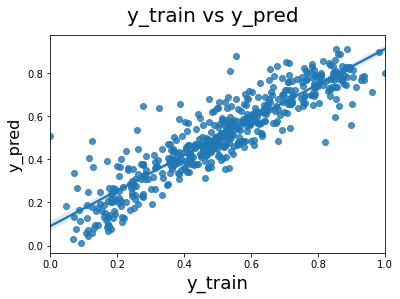

In [66]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(y_train, y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

Text(0.5, 0, 'Residual Errors')

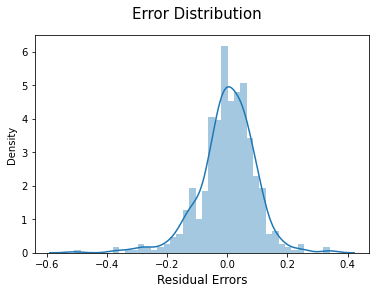

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 40)
fig.suptitle('Error Distribution', fontsize = 15)                  # Plot heading 
plt.xlabel('Residual Errors', fontsize = 12)                         # X-label

#### Oservation
Mean is lying at zero - one of the assumption of linear regression

In [68]:
### check the mean of the error terms
lr_model.resid.sum()

-5.440092820663267e-14

#### Oservation
Total sum of residuals is zero

Text(0.5, 0, 'y-pred')

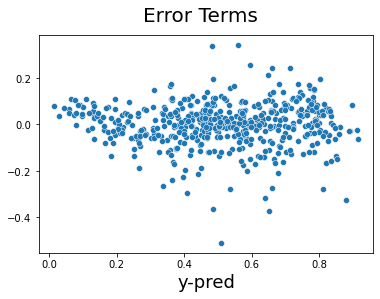

In [69]:
## check the independence and the variance of the error terms 
fig = plt.figure()
sns.scatterplot(y_train_pred,(y_train - y_train_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('y-pred', fontsize = 18)                         # X-label

The errors terms are randomly disributed and present no pattern

The variance of the error terms also appears mostly constant

### Step 7: Evaluation on the Test Set

In [70]:
# Scaling on the test data
df_test = pd.DataFrame(scaler.transform(df_test), columns = df_test.columns)
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.0,1.0,0.0,0.769660,0.657364,0.084219,0.692706,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.842587,0.610133,0.153728,0.712034,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.496145,0.837699,0.334206,0.303382,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.795343,0.437098,0.339570,0.547400,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.741471,0.314298,0.537414,0.569029,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [71]:
X_train_new.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'summer', 'winter',
       'sat', 'clear', 'aug', 'sep'],
      dtype='object')

In [72]:
#X_test,y_test from df_test
y_test=df_test.pop('cnt')
X_test=df_test

In [73]:
# predict

# Create X_test_new dataframe by selecting the Only columns finalised in regression model from training data.
X_test_new = X_test[X_train_new.columns]

# Add constant to data to represent intercept
X_test_new = sm.add_constant(X_test_new)

In [74]:
# Making predictions
y_pred = lr_model.predict(X_test_new)

Text(0, 0.5, 'y_pred')

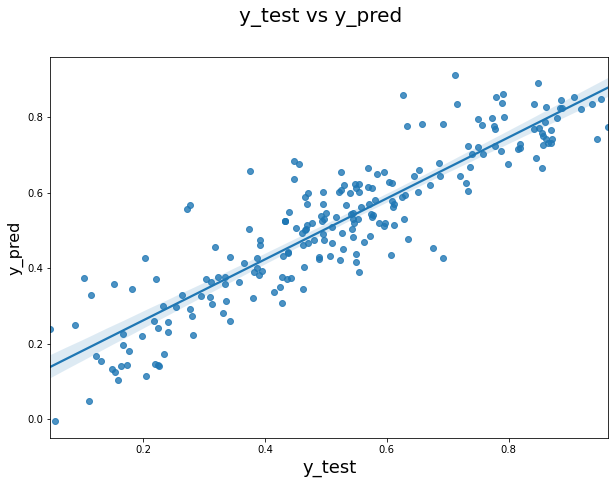

In [75]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,7))
sns.regplot(y_test,y_pred)

fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'Residual')

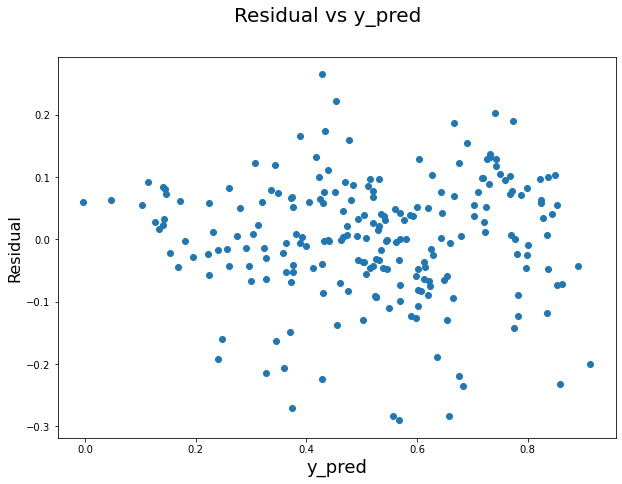

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,7))
plt.scatter(y_pred,y_test-y_pred)

fig.suptitle('Residual vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_pred', fontsize=18)                          # X-label
plt.ylabel('Residual', fontsize=16)                          # Y-label

In [77]:
print('Test R-square is')
print(round(r2_score(y_test, y_pred),3))

Test R-square is
0.807


In [78]:
print('Train R-square is :', 0.824)

Train R-square is : 0.824


In [79]:
print('Percentage difference between Train and Test :',round((.824-.807)*100,0))

Percentage difference between Train and Test : 2.0
